## Projet : Construction d'un RBM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

from principal_RBM_alpha import RBM
from principal_DBN_alpha import DBN
from principal_DNN_MNIST import DNN

## Dataset

In [2]:
bin_alpha_digits = scipy.io.loadmat("binaryalphadigs.mat")
bin_alpha_digits = bin_alpha_digits["dat"]

In [3]:
def lire_alpha_digit(elements):
    X = []
    for elem in elements:
        for i in bin_alpha_digits[elem]:
            X.append(i.flatten())
    return np.array(X)

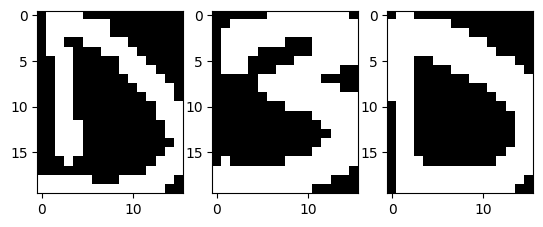

In [4]:
trains = np.random.randint(0, 39, 3)
idxs = np.random.randint(0, 30, 3)

fig, axes = plt.subplots(1, 3)  

for idx, train, ax in zip(idxs, trains, axes):
    img = lire_alpha_digit([idx])[train]
    ax.imshow(img.reshape((20, 16)), cmap="gray", interpolation="nearest")

plt.show()

Epoch 1/200, Reconstruction Error: 0.24066874017496623
Epoch 2/200, Reconstruction Error: 0.2183059146391744
Epoch 3/200, Reconstruction Error: 0.1888098475583127
Epoch 4/200, Reconstruction Error: 0.18804892743318066
Epoch 5/200, Reconstruction Error: 0.16769175709109388
Epoch 6/200, Reconstruction Error: 0.16183252770212106
Epoch 7/200, Reconstruction Error: 0.16433740735564123
Epoch 8/200, Reconstruction Error: 0.1555765809561973
Epoch 9/200, Reconstruction Error: 0.13285195305575026
Epoch 10/200, Reconstruction Error: 0.14741013417427995
Epoch 11/200, Reconstruction Error: 0.17441238430972875
Epoch 12/200, Reconstruction Error: 0.13425196249046545
Epoch 13/200, Reconstruction Error: 0.13073308513200552
Epoch 14/200, Reconstruction Error: 0.13594393231048413
Epoch 15/200, Reconstruction Error: 0.10984684257819029
Epoch 16/200, Reconstruction Error: 0.11500865016942814
Epoch 17/200, Reconstruction Error: 0.11790425520723721
Epoch 18/200, Reconstruction Error: 0.13249415088524577
Epoc

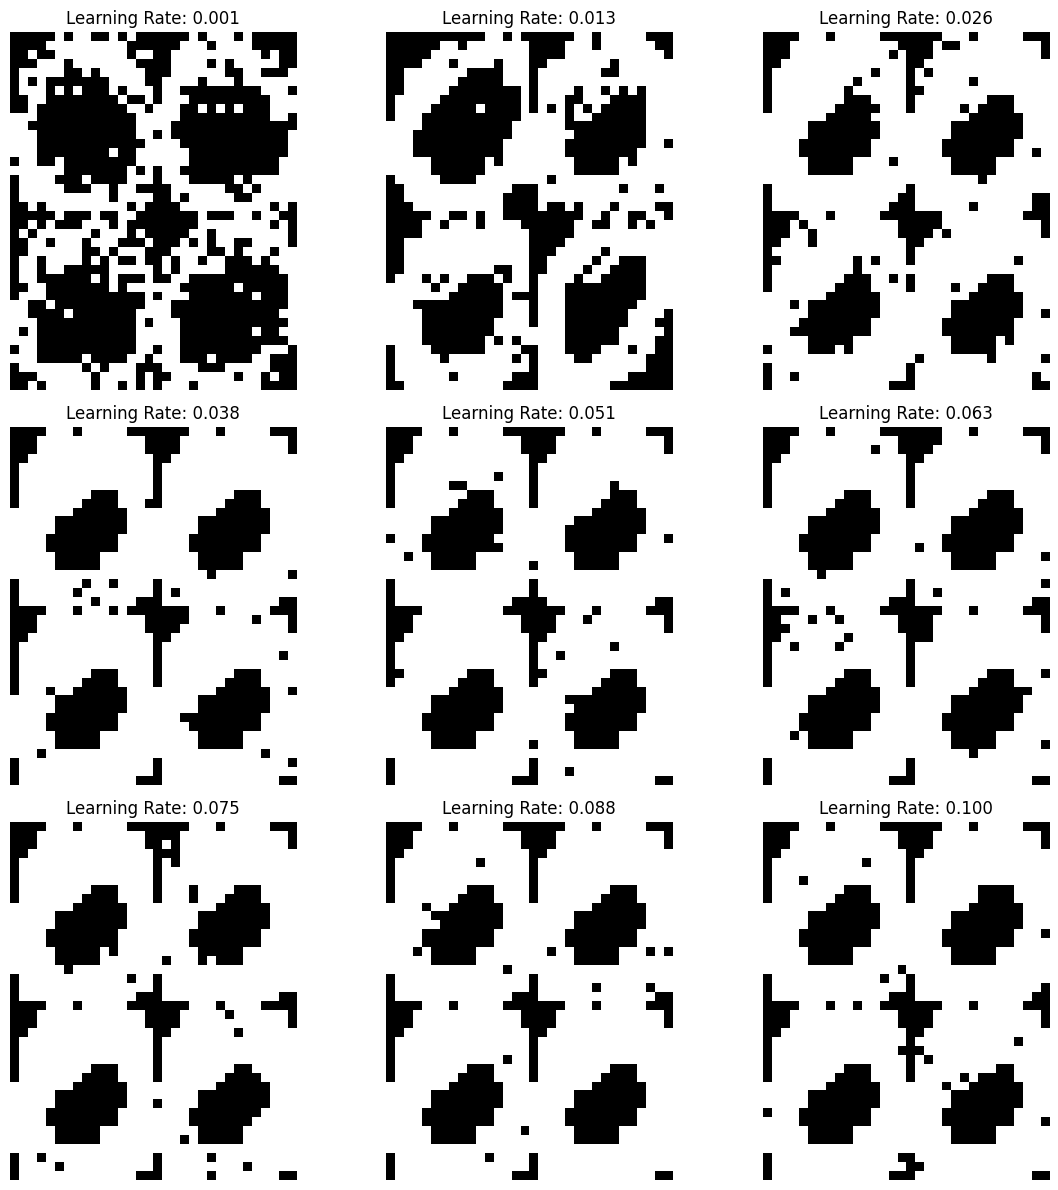

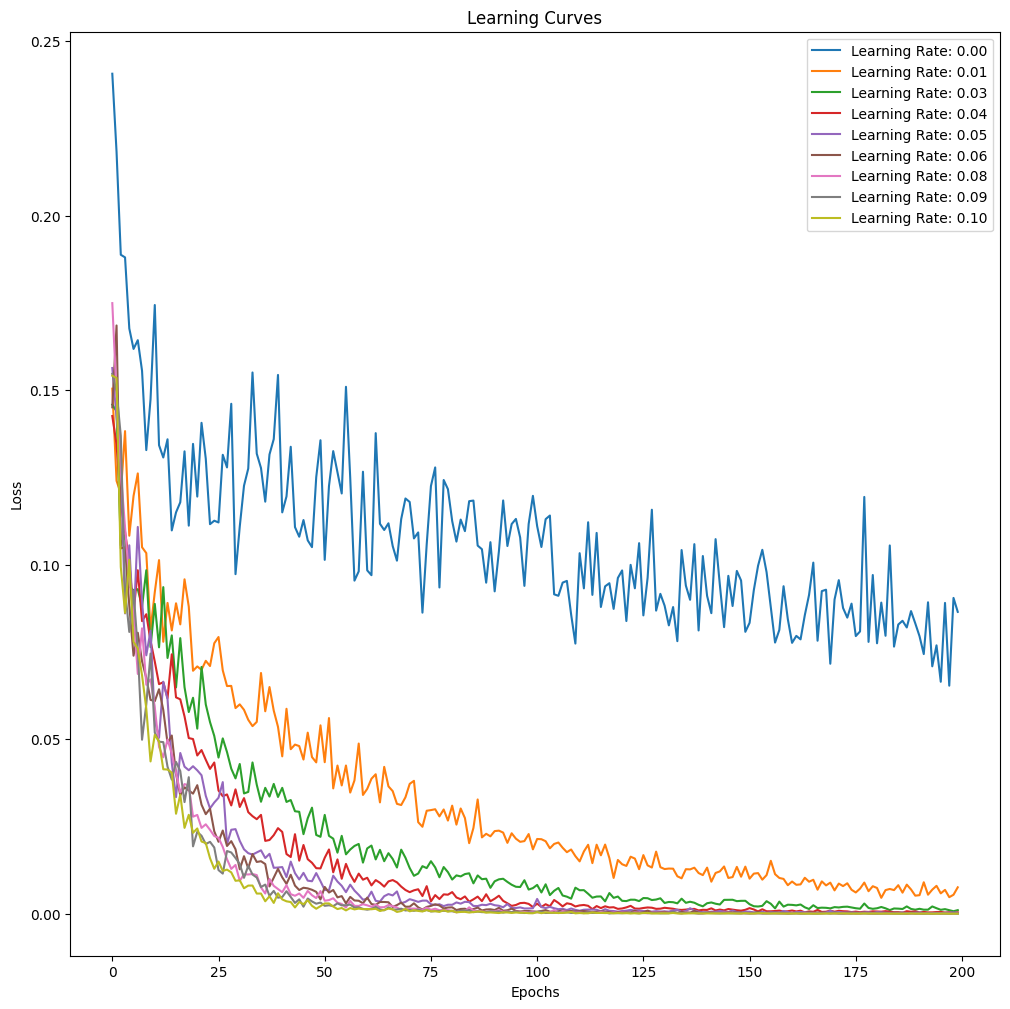

In [5]:
num_models = 9
grid_size = 3
image_size = (20, 16)
num_images = 4  
nb_epoch = 200
batch_size = 8
gibbs_iter = 100

learning_rates = np.linspace(0.001, 0.1, num_models)
models = [RBM(320, 400) for _ in learning_rates]

images = []
learning_curves = []
for model, lr in zip(models, learning_rates):
    error = model.train_RBM(lire_alpha_digit([0]), nb_epoch, lr, batch_size)
    images.append(model.generer_image_RBM(gibbs_iter, num_images))
    learning_curves.append(error)

fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
for idx, (image_set, lr) in enumerate(zip(images, learning_rates)):
    row = idx // grid_size
    col = idx % grid_size
    combined_image = np.vstack(
        [
            np.hstack(
                [image_set[0].reshape(image_size), image_set[1].reshape(image_size)]
            ),
            np.hstack(
                [image_set[2].reshape(image_size), image_set[3].reshape(image_size)]
            ),
        ]
    )
    axes[row, col].imshow(combined_image, cmap="gray")
    axes[row, col].set_title(f"Learning Rate: {lr:.3f}")
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 12))
for idx, (curve, lr) in enumerate(zip(learning_curves, learning_rates)):
    plt.plot(curve, label=f"Learning Rate: {lr:.2f}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curves")
plt.legend()
plt.show()

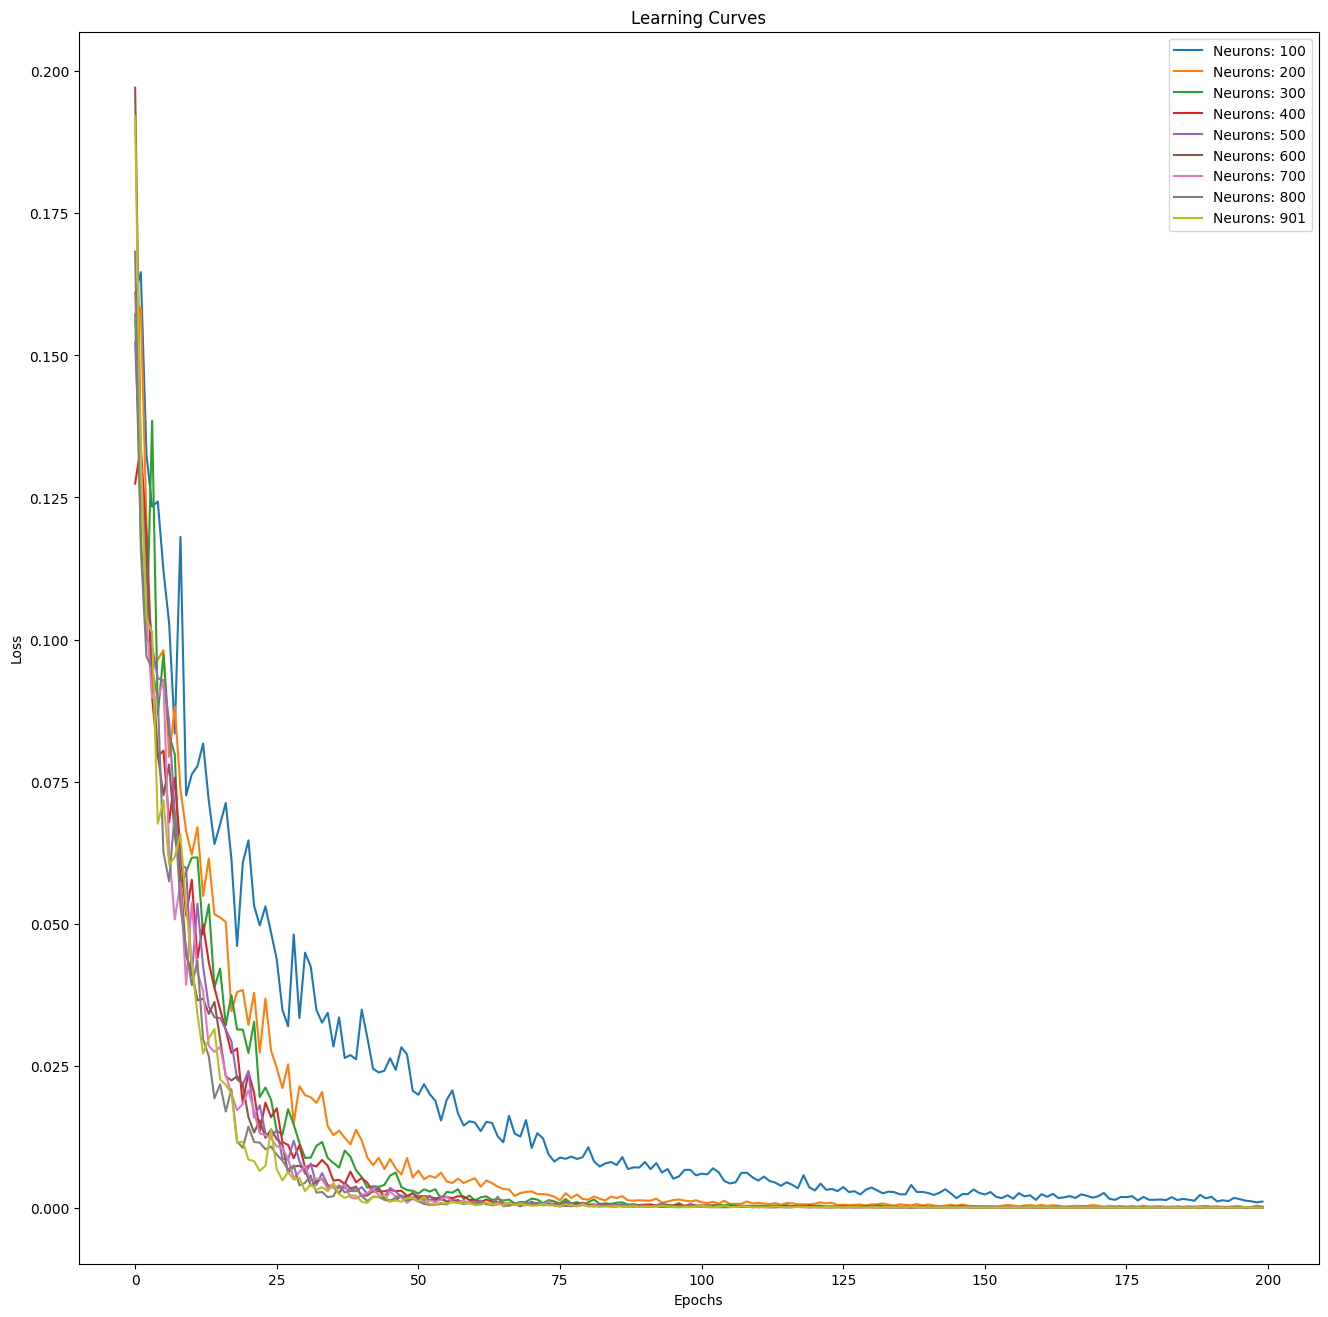

In [8]:
plt.figure(figsize=(16, 16))
for idx, (curve, neurons) in enumerate(zip(learning_curves, neuron_counts)):
    plt.plot(curve, label=f"Neurons: {neurons}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curves")
plt.legend()
plt.show()

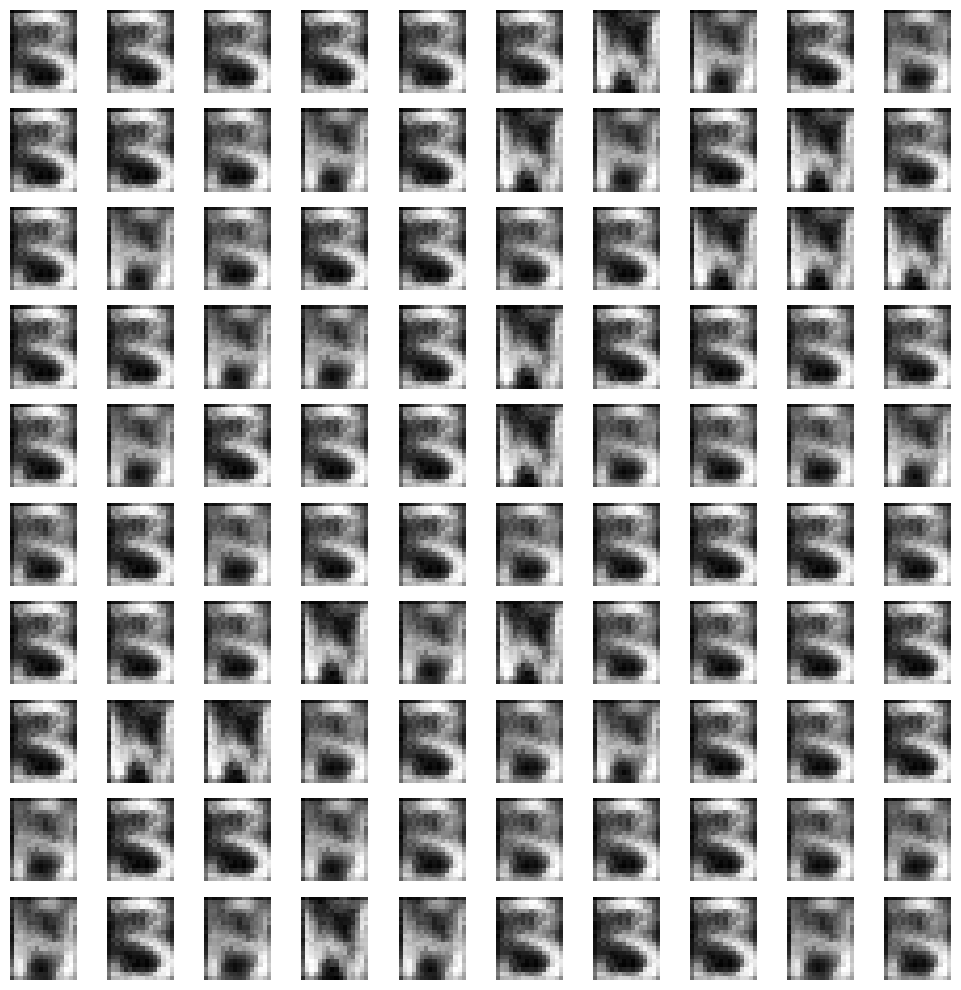

In [11]:

im = rbm.generer_image_RBM(100, 10)

# Determine the grid size
num_images = len(im)
grid_size = int(np.ceil(np.sqrt(num_images)))

# Create a figure with subplots
fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))

# Plot each image in the grid
for idx, image in enumerate(im):
    row = idx // grid_size
    col = idx % grid_size
    axes[row, col].imshow(image.reshape(20, 16), cmap="gray")
    axes[row, col].axis("off")  # Hide axes

# Hide any unused subplots
for idx in range(num_images, grid_size * grid_size):
    row = idx // grid_size
    col = idx % grid_size
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

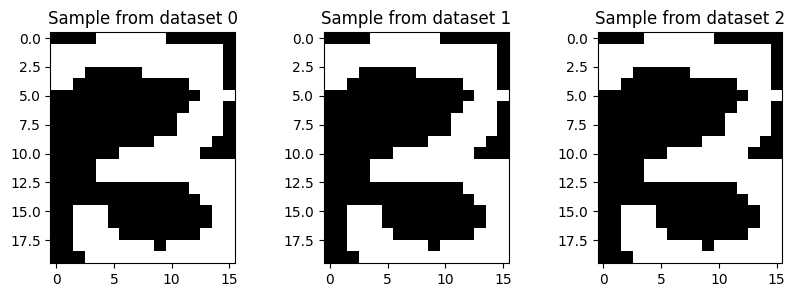

Epoch 1/200, Reconstruction Error: 0.17363859987226635
Epoch 2/200, Reconstruction Error: 0.14415186088396773
Epoch 3/200, Reconstruction Error: 0.15855261184676173
Epoch 4/200, Reconstruction Error: 0.1316356519395544
Epoch 5/200, Reconstruction Error: 0.11996906083821247
Epoch 6/200, Reconstruction Error: 0.08913869870228133
Epoch 7/200, Reconstruction Error: 0.09238719542294377
Epoch 8/200, Reconstruction Error: 0.0736485430361373
Epoch 9/200, Reconstruction Error: 0.06509110988392883
Epoch 10/200, Reconstruction Error: 0.06545669341663114
Epoch 11/200, Reconstruction Error: 0.054532624020426856
Epoch 12/200, Reconstruction Error: 0.049316040311664165
Epoch 13/200, Reconstruction Error: 0.03793626631126826
Epoch 14/200, Reconstruction Error: 0.03762742341653835
Epoch 15/200, Reconstruction Error: 0.033231063628188506
Epoch 16/200, Reconstruction Error: 0.03849925829227994
Epoch 17/200, Reconstruction Error: 0.028279601594045203
Epoch 18/200, Reconstruction Error: 0.02327877625860625

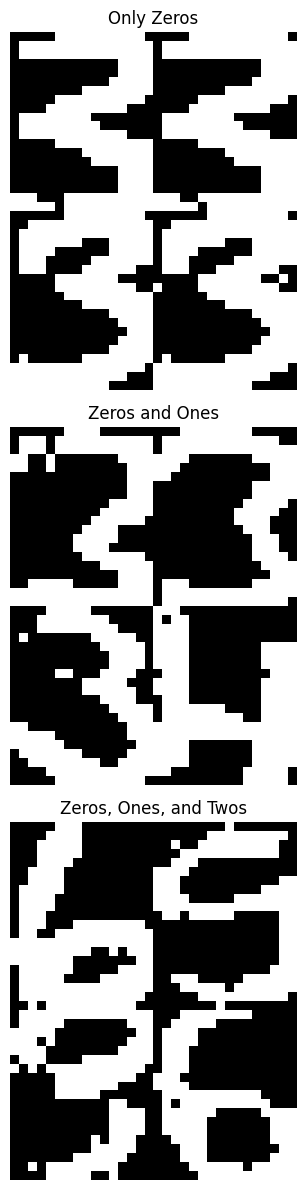

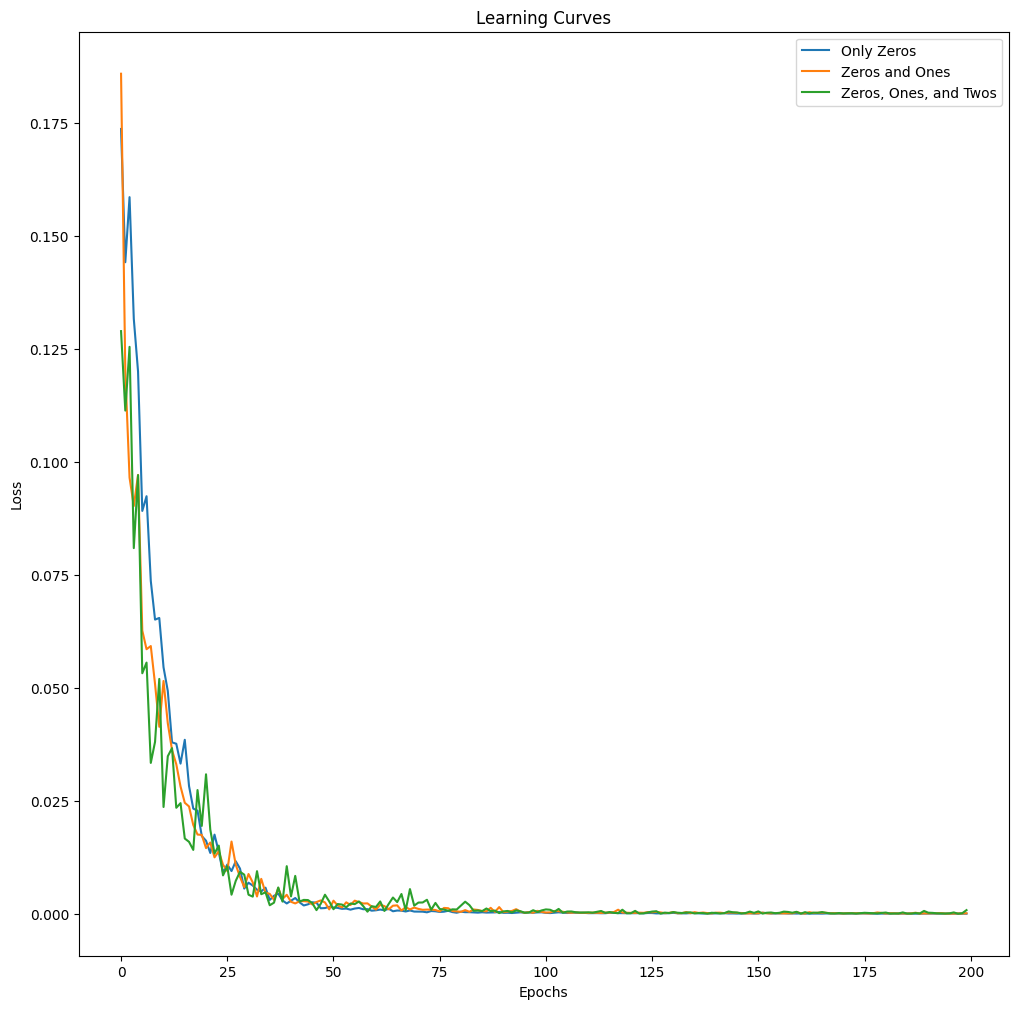

In [6]:
num_models = 3
grid_size = 1
image_size = (20, 16)
num_images = 4
nb_epoch = 200
batch_size = 8
learning_rate = 0.1
gibbs_iter = 100


datasets = [
    lire_alpha_digit([3]),  
    lire_alpha_digit([3, 4, 5, 6]),  
    lire_alpha_digit([3, 4, 5, 6, 7, 8, 9]),  
]

plt.figure(figsize=(10, 3))
for i, data in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.imshow(data[0].reshape(20, 16), cmap="gray")
    plt.title(f"Sample from dataset {i}")
plt.show()


models = [RBM(320, 400) for _ in datasets]

images = []
learning_curves = []
for model, data in zip(models, datasets):
    error = model.train_RBM(data, nb_epoch, learning_rate, batch_size)
    images.append(model.generer_image_RBM(gibbs_iter, num_images))
    learning_curves.append(error)

fig, axes = plt.subplots(num_models, grid_size, figsize=(12, 12))
titles = ["Only Zeros", "Zeros and Ones", "Zeros, Ones, and Twos"]
for idx, (image_set, title) in enumerate(zip(images, titles)):
    combined_image = np.vstack(
        [
            np.hstack(
                [image_set[0].reshape(image_size), image_set[1].reshape(image_size)]
            ),
            np.hstack(
                [image_set[2].reshape(image_size), image_set[3].reshape(image_size)]
            ),
        ]
    )
    axes[idx].imshow(combined_image, cmap="gray")
    axes[idx].set_title(title)
    axes[idx].axis("off")

plt.tight_layout()
plt.show()

# Plot learning curves
plt.figure(figsize=(12, 12))
for idx, (curve, title) in enumerate(zip(learning_curves, titles)):
    plt.plot(curve, label=title)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curves")
plt.legend()
plt.show()

# DBN

In [30]:
num_visible = 320
hidden_layers = [
    [320, 100],
    [320, 200, 100],
    [320, 200, 200, 100],
    [320, 200, 200, 200, 100],
    [320, 200, 200, 200, 200, 100],
    [320, 200, 200, 200, 200, 200, 100],
    [320, 200, 200, 200, 200, 200, 200, 100],
    [320, 200, 200, 200, 200, 200, 200, 200, 100],
    [320, 200, 200, 200, 200, 200, 200, 200, 200, 100],
]
num_models = len(hidden_layers)
image_size = (20, 16)
num_samples = 4
nb_epoch = 400
batch_size = 8
learning_rate = 0.1
gibbs_iter = 100

data = lire_alpha_digit([5,6,7,8])   

In [34]:
all_samples = []
all_models = []

for idx, layer_sizes in enumerate(hidden_layers):
    model = DBN(layer_sizes)
    model.train_DBN(
        data, epochs=nb_epoch, learning_rate=learning_rate, batch_size=batch_size
    )

    samples = model.generer_image_DBN(gibbs_iter, num_samples)
    all_samples.append(samples)
    all_models.append(model)

Training RBM 1/1
Epoch 1/400, Reconstruction Error: 0.20705187581837006
Epoch 2/400, Reconstruction Error: 0.1449128115740963
Epoch 3/400, Reconstruction Error: 0.1152683150109699
Epoch 4/400, Reconstruction Error: 0.08522004405468853
Epoch 5/400, Reconstruction Error: 0.11904629335954427
Epoch 6/400, Reconstruction Error: 0.13473479415776923
Epoch 7/400, Reconstruction Error: 0.09104921235351572
Epoch 8/400, Reconstruction Error: 0.09454454867605946
Epoch 9/400, Reconstruction Error: 0.10098631118035026
Epoch 10/400, Reconstruction Error: 0.08341126664138065
Epoch 11/400, Reconstruction Error: 0.11609122320153957
Epoch 12/400, Reconstruction Error: 0.09505298265252288
Epoch 13/400, Reconstruction Error: 0.08444742877761344
Epoch 14/400, Reconstruction Error: 0.06901494229821539
Epoch 15/400, Reconstruction Error: 0.06289379452637331
Epoch 16/400, Reconstruction Error: 0.05837046376564643
Epoch 17/400, Reconstruction Error: 0.062410576011219646
Epoch 18/400, Reconstruction Error: 0.056

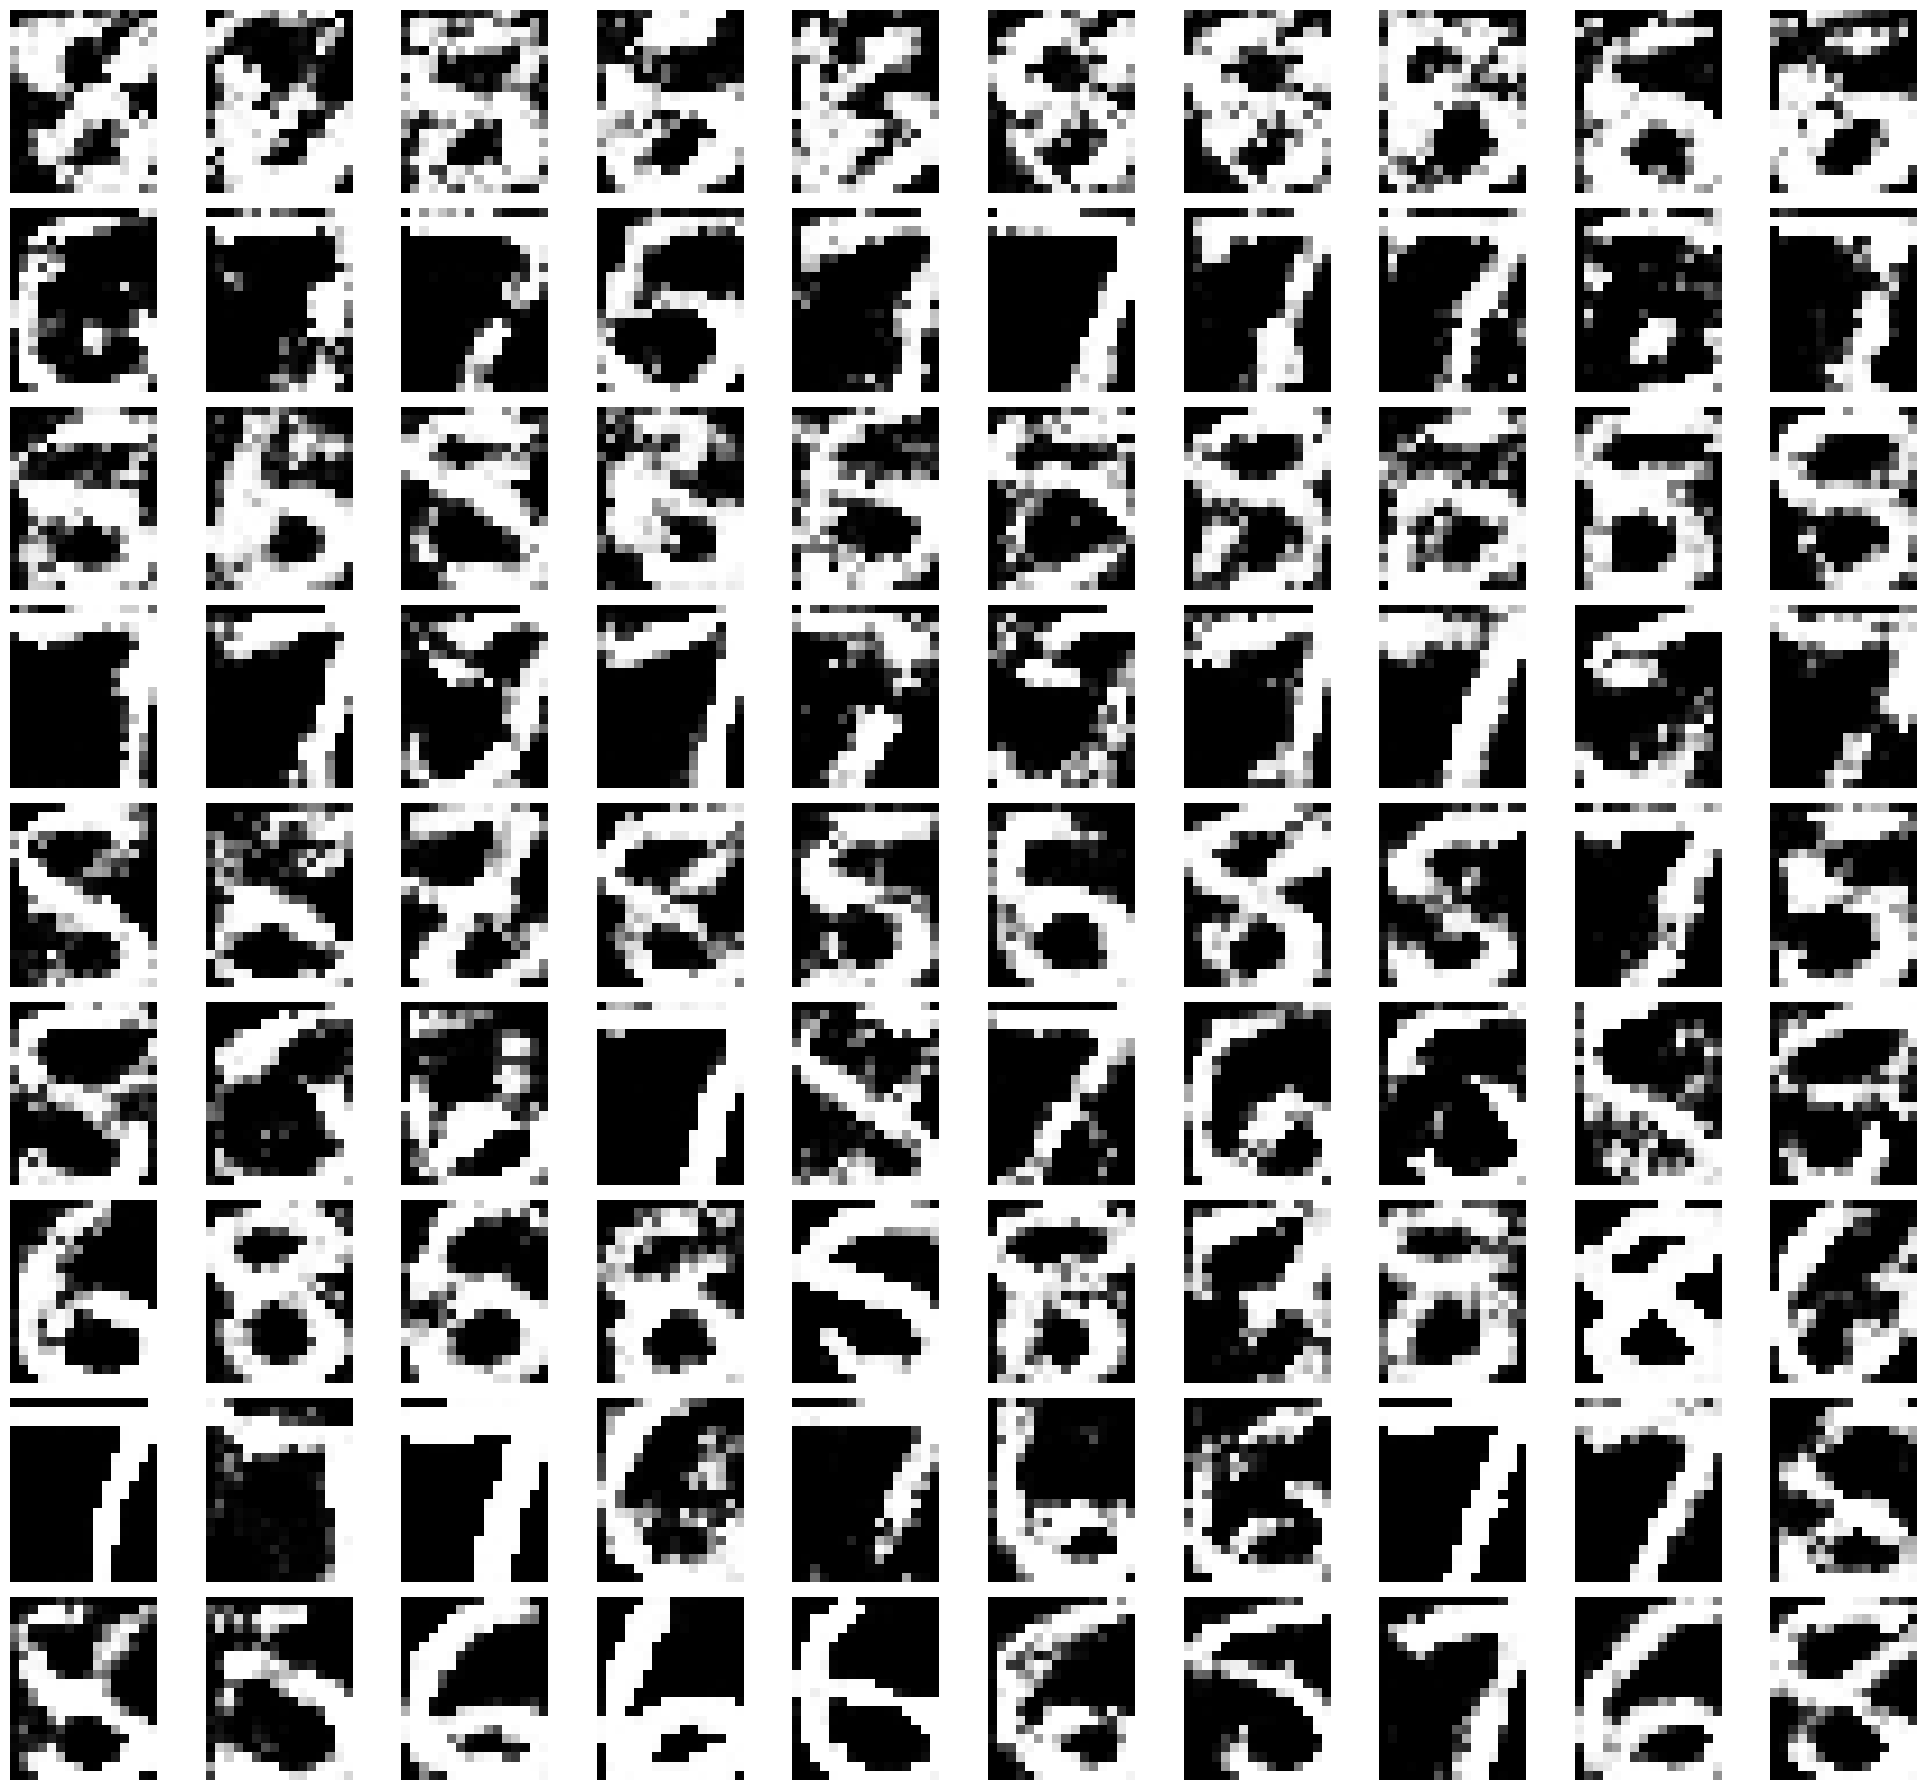

In [39]:
num_samples = 10  
gibbs_iter = 1000

all_samples = []
for model in all_models:
    samples = model.generer_image_DBN(gibbs_iter, num_samples)
    all_samples.append(samples)

fig, axes = plt.subplots(9, 10, figsize=(20, 18))

for idx, samples in enumerate(all_samples):
    for i in range(num_samples):
        ax = axes[idx, i]
        ax.imshow(samples[i].reshape(20, 16), cmap="gray")
        ax.axis("off")

plt.subplots_adjust(wspace=0.1, hspace=0.1)  
plt.tight_layout()
plt.show()

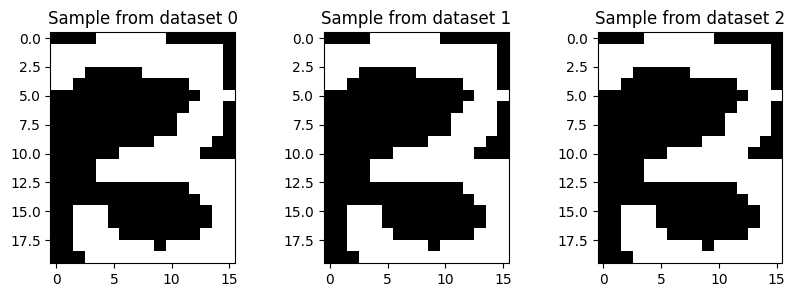

Training RBM 1/7
Epoch 1/400, Reconstruction Error: 0.17802686346653038
Epoch 2/400, Reconstruction Error: 0.17142773250443558
Epoch 3/400, Reconstruction Error: 0.15749683731023736
Epoch 4/400, Reconstruction Error: 0.12190984119585332
Epoch 5/400, Reconstruction Error: 0.12854184607524993
Epoch 6/400, Reconstruction Error: 0.11342513573427317
Epoch 7/400, Reconstruction Error: 0.10550652435197032
Epoch 8/400, Reconstruction Error: 0.10002881100807398
Epoch 9/400, Reconstruction Error: 0.08001759204846295
Epoch 10/400, Reconstruction Error: 0.07110193128050357
Epoch 11/400, Reconstruction Error: 0.07117957417848453
Epoch 12/400, Reconstruction Error: 0.05871616035920099
Epoch 13/400, Reconstruction Error: 0.055518953092603726
Epoch 14/400, Reconstruction Error: 0.06044973178904302
Epoch 15/400, Reconstruction Error: 0.04919266894159176
Epoch 16/400, Reconstruction Error: 0.04257300441696589
Epoch 17/400, Reconstruction Error: 0.03975933330367228
Epoch 18/400, Reconstruction Error: 0.0

In [44]:
num_models = 3
image_size = (20, 16)
num_images = 4
nb_epoch = 400
batch_size = 8
learning_rate = 0.1
gibbs_iter = 1000

datasets = [
    lire_alpha_digit([3]), 
    lire_alpha_digit([3, 4, 5, 6]), 
    lire_alpha_digit([3, 4, 5, 6, 7, 8, 9]), 
]

plt.figure(figsize=(10, 3))
for i, data in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.imshow(data[0].reshape(20, 16), cmap="gray")
    plt.title(f"Sample from dataset {i}")
plt.show()

models = [ DBN([320, 200, 200, 200, 200, 200, 200, 100]) for _ in datasets]

images = []
learning_curves = []
for model, data in zip(models, datasets):
    error = model.train_DBN(data, nb_epoch, learning_rate, batch_size)
    images.append(model.generer_image_DBN(gibbs_iter, num_images))
    learning_curves.append(error)

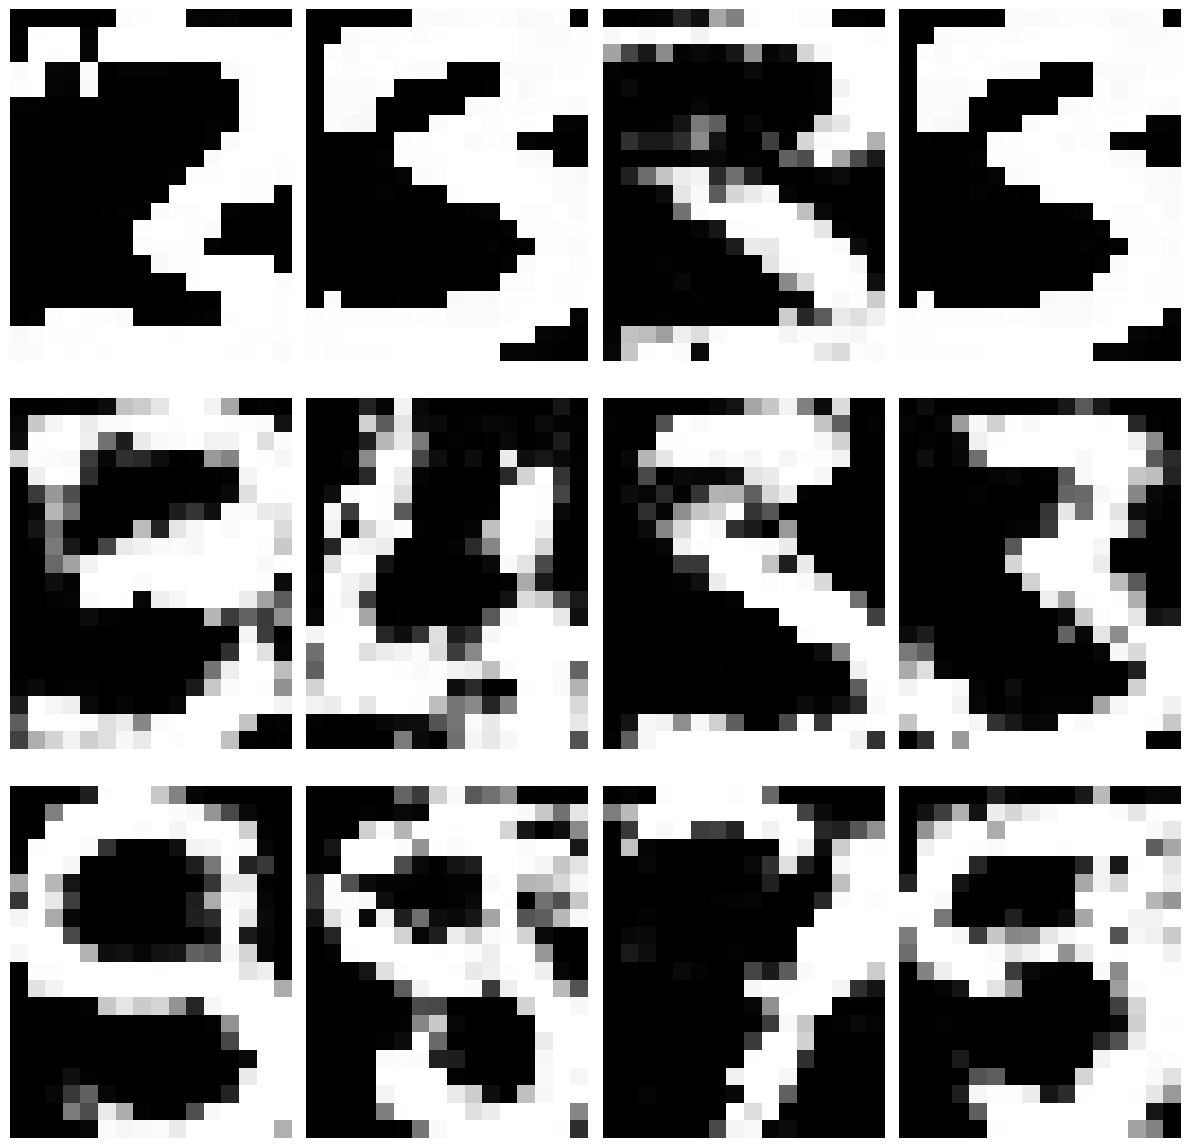

In [45]:
num_models = len(images)
num_samples = len(images[0])

fig, axes = plt.subplots(num_models, num_samples, figsize=(12, 12))

for model_idx, image_set in enumerate(images):
    for sample_idx, image in enumerate(image_set):
        ax = axes[model_idx, sample_idx]
        ax.imshow(image.reshape(image_size), cmap="gray")
        ax.axis("off") 

plt.tight_layout()
plt.show()

## DNN

In [22]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from dnn import DNN

In [27]:
data = np.load('data.npy')
labels = np.load('labels.npy')

In [28]:
data = np.where(
    data < 127, 0, 1
)

data, labels = resample(data, labels, n_samples=60000)
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(np.array(labels).reshape(-1, 1))

train_data, test_data, train_labels, test_labels = train_test_split(
    data, y_one_hot, test_size=0.2
)

layer_sizes = [784, 500, 100, 10] 


In [17]:
layer_sizes_list = [
    [784, 200, 200, 10],
    [784, 300, 300, 10],
    [784, 200, 200, 200, 10],
]
batch_size = 32
learning_rate = 0.1

In [18]:
non_pretrained_models = []
non_pretrained_errors = []
for layer_sizes in layer_sizes_list:
    dnn = DNN(layer_sizes)
    dnn.retropropagation(200, learning_rate, batch_size, train_data, train_labels)
    non_pretrained_errors.append(dnn.test_DNN(test_data, test_labels))
    non_pretrained_models.append(dnn)

Epoch 1/200, Cross Entropy: 0.678544660057941
Epoch 2/200, Cross Entropy: 0.48313381997085003
Epoch 3/200, Cross Entropy: 0.4104784796590754
Epoch 4/200, Cross Entropy: 0.369305916044334
Epoch 5/200, Cross Entropy: 0.34097738145808915
Epoch 6/200, Cross Entropy: 0.319253369548502
Epoch 7/200, Cross Entropy: 0.30144183439681604
Epoch 8/200, Cross Entropy: 0.28618004667572794
Epoch 9/200, Cross Entropy: 0.2727020428230414
Epoch 10/200, Cross Entropy: 0.2605449060807108
Epoch 11/200, Cross Entropy: 0.24941297381788377
Epoch 12/200, Cross Entropy: 0.239108474570043
Epoch 13/200, Cross Entropy: 0.2294935340977963
Epoch 14/200, Cross Entropy: 0.22046826389405902
Epoch 15/200, Cross Entropy: 0.21195757705873722
Epoch 16/200, Cross Entropy: 0.20390298659596914
Epoch 17/200, Cross Entropy: 0.19625744227114506
Epoch 18/200, Cross Entropy: 0.18898212057828884
Epoch 19/200, Cross Entropy: 0.18204444620819563
Epoch 20/200, Cross Entropy: 0.17541682418569057
Epoch 21/200, Cross Entropy: 0.1690757457

In [19]:
pretrained_models = []
pretrained_errors = []
for layer_sizes in layer_sizes_list:
    dnn = DNN(layer_sizes)
    dnn.pretrain_DNN(100, learning_rate, batch_size, train_data)
    dnn.retropropagation(200, learning_rate, batch_size, train_data, train_labels)
    pretrained_errors.append(dnn.test_DNN(test_data, test_labels))
    pretrained_models.append(dnn)

PRETraining RBM for DNN 1/2
Epoch 1/100, Reconstruction Error: 28.550554405551885
Epoch 2/100, Reconstruction Error: 23.862651047189345
Epoch 3/100, Reconstruction Error: 21.55812964098675
Epoch 4/100, Reconstruction Error: 20.043412385742997
Epoch 5/100, Reconstruction Error: 18.88777192141844
Epoch 6/100, Reconstruction Error: 17.891283095572238
Epoch 7/100, Reconstruction Error: 17.288097517450726
Epoch 8/100, Reconstruction Error: 16.775144042021978
Epoch 9/100, Reconstruction Error: 16.230154848334454
Epoch 10/100, Reconstruction Error: 15.844364580138208
Epoch 11/100, Reconstruction Error: 15.431057345761092
Epoch 12/100, Reconstruction Error: 15.094360672368767
Epoch 13/100, Reconstruction Error: 14.828209327659941
Epoch 14/100, Reconstruction Error: 14.552637894719432
Epoch 15/100, Reconstruction Error: 14.335608841071231
Epoch 16/100, Reconstruction Error: 14.108690915531621
Epoch 17/100, Reconstruction Error: 13.948311576512424
Epoch 18/100, Reconstruction Error: 13.752053763

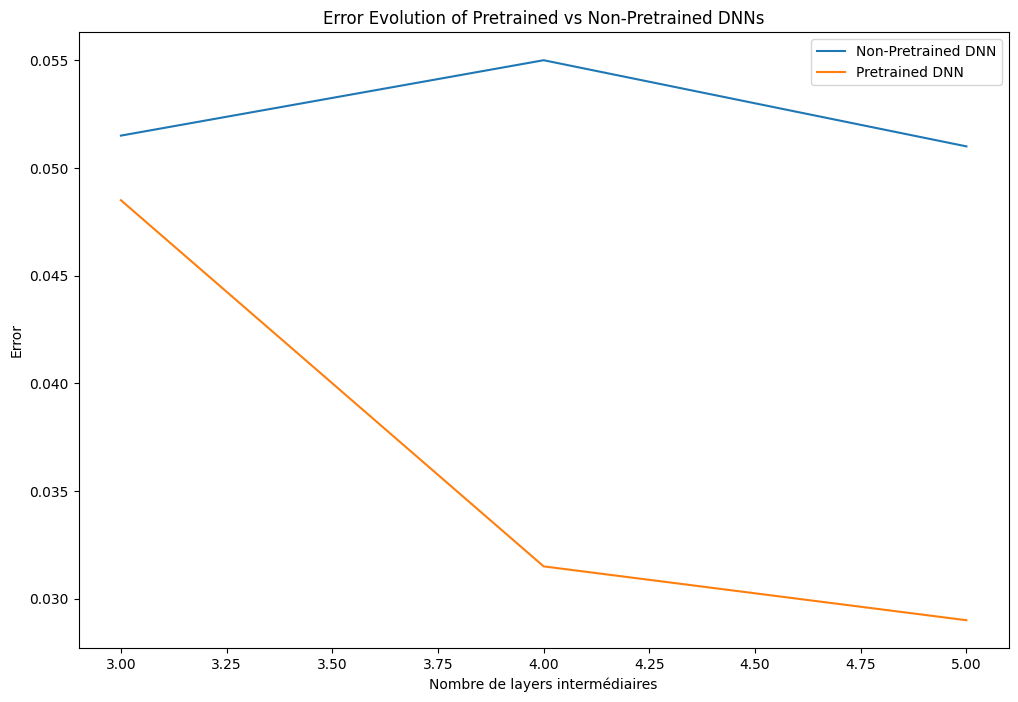

In [21]:
# Define the x-values corresponding to the number of layers
x_values = [3, 4, 5]

# Plot the error evolution
plt.figure(figsize=(12, 8))

plt.plot(x_values, non_pretrained_errors, label="Non-Pretrained DNN")
plt.plot(x_values, pretrained_errors, label="Pretrained DNN")

plt.xlabel("Nombre de layers intermédiaires")
plt.ylabel("Error")
plt.title("Error Evolution of Pretrained vs Non-Pretrained DNNs")
plt.legend()

plt.show()

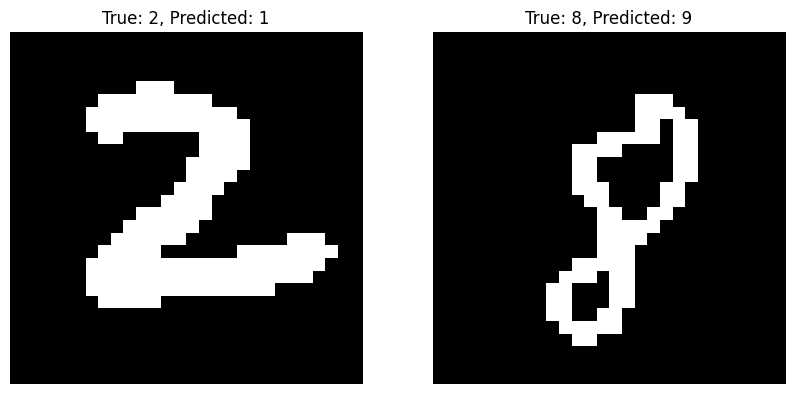

In [10]:
test_indices = np.random.choice(len(test_data), 2, replace=False)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for idx, test_idx in enumerate(test_indices):
    image = test_data[test_idx].reshape(28, 28)
    true_label = np.argmax(test_labels[test_idx])
    predicted_label = np.argmax(dnn_pretrain_test.entree_sortie_reseau(test_data[test_idx].reshape(1, -1))[1])

    axes[idx].imshow(image, cmap="gray")
    axes[idx].set_title(f"True: {true_label}, Predicted: {predicted_label}")
    axes[idx].axis("off")

plt.show()

In [8]:
layer_sizes = [784, 300, 300, 10]
learning_rate = 0.1
batch_size = 8

dnn = DNN(layer_sizes)
dnn.pretrain_DNN(100, learning_rate, batch_size, train_data)
dnn.retropropagation(200, learning_rate, batch_size, train_data, train_labels)

KeyboardInterrupt: 

PRETraining RBM for DNN 1/3
Epoch 1/10, Reconstruction Error: 18.5648954908201
Epoch 2/10, Reconstruction Error: 15.422661386288178
Epoch 3/10, Reconstruction Error: 13.772758396701787
Epoch 4/10, Reconstruction Error: 12.886219467742453
Epoch 5/10, Reconstruction Error: 12.268734961937191
Epoch 6/10, Reconstruction Error: 11.81058367176108
Epoch 7/10, Reconstruction Error: 11.419520554741263
Epoch 8/10, Reconstruction Error: 11.170595514548047
Epoch 9/10, Reconstruction Error: 10.899908488106275
Epoch 10/10, Reconstruction Error: 10.730187141650125
PRETraining RBM for DNN 2/3
Epoch 1/10, Reconstruction Error: 7.333085087146601
Epoch 2/10, Reconstruction Error: 5.729860993126815
Epoch 3/10, Reconstruction Error: 4.988415635621195
Epoch 4/10, Reconstruction Error: 4.576048233336047
Epoch 5/10, Reconstruction Error: 4.310272511567061
Epoch 6/10, Reconstruction Error: 4.116098633010786
Epoch 7/10, Reconstruction Error: 4.00502860221481
Epoch 8/10, Reconstruction Error: 3.8724390993104087


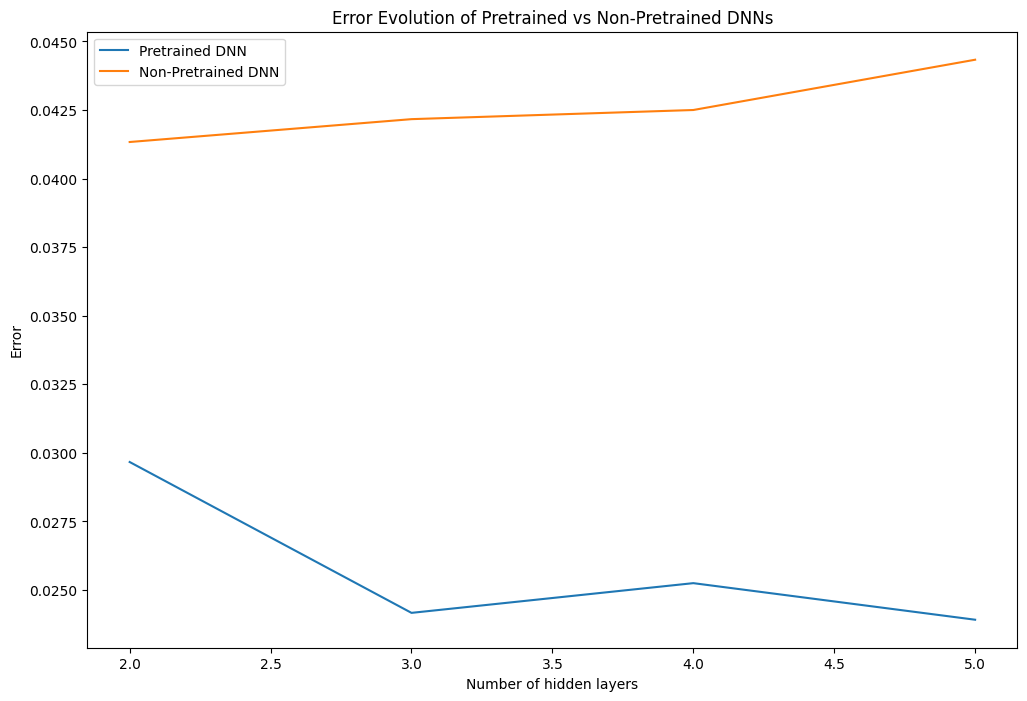

In [29]:
layer_sizes_list = [
    [784, 200, 200, 10],
    [784, 300, 300, 10],
    [784, 400, 400, 10],
    [784, 500, 500, 10],
]

batch_size = 32
learning_rate = 0.1
nb_epoch = 10

pretrained_models = []
pretrained_errors = []
for layer_sizes in layer_sizes_list:
    dnn = DNN(layer_sizes)
    dnn.pretrain_DNN(nb_epoch, learning_rate, batch_size, train_data)
    dnn.retropropagation(nb_epoch, learning_rate, batch_size, train_data, train_labels)
    pretrained_errors.append(dnn.test_DNN(test_data, test_labels))
    pretrained_models.append(dnn)

non_pretrained_models = []
non_pretrained_errors = []
for layer_sizes in layer_sizes_list:
    dnn = DNN(layer_sizes)
    dnn.retropropagation(nb_epoch, learning_rate, batch_size, train_data, train_labels)
    non_pretrained_errors.append(dnn.test_DNN(test_data, test_labels))
    non_pretrained_models.append(dnn)

for idx, error in enumerate(pretrained_errors):
    print(f"Pretrained Model with middle layer {layer_sizes_list[idx][1]} neurons - Error: {error}")

for idx, error in enumerate(non_pretrained_errors):
    print(f"Non-Pretrained Model with middle layer {layer_sizes_list[idx][1]} neurons - Error: {error}")

x_values = [2, 3, 4, 5]  

plt.figure(figsize=(12, 8))
plt.plot(x_values, pretrained_errors, label="Pretrained DNN")
plt.plot(x_values, non_pretrained_errors, label="Non-Pretrained DNN")

plt.xlabel("Number of hidden layers")
plt.ylabel("Error")
plt.title("Error Evolution of Pretrained vs Non-Pretrained DNNs")
plt.legend()

plt.show()

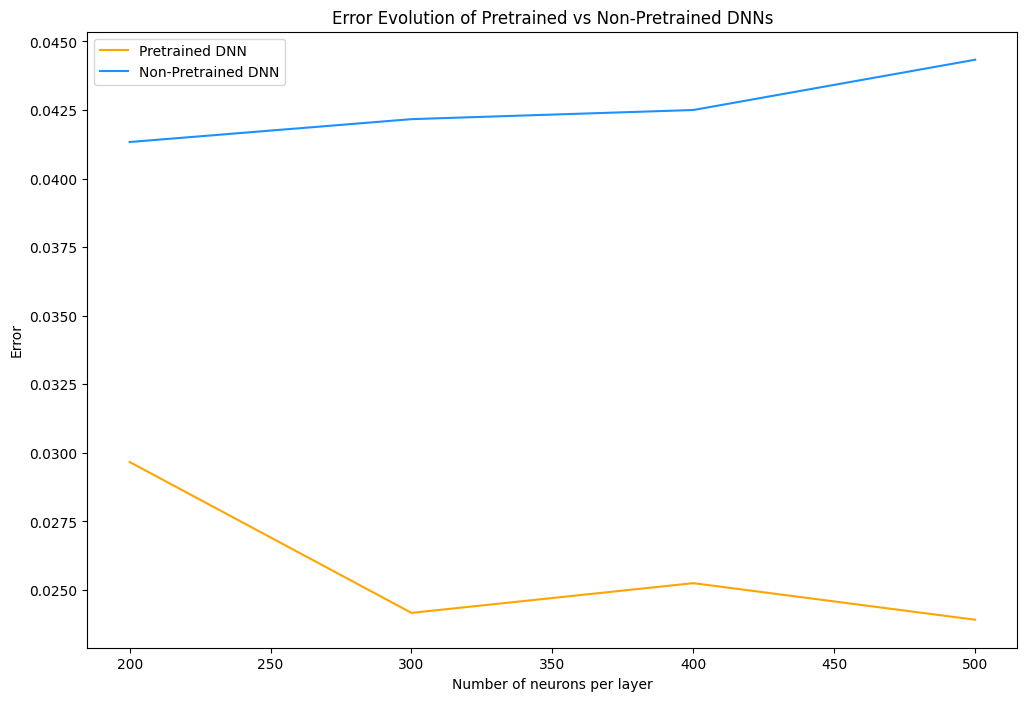

In [37]:
# Plot the error evolution
x_values = [200, 300, 400, 500] 

plt.figure(figsize=(12, 8))
plt.plot(x_values, pretrained_errors, label="Pretrained DNN", color="orange")
plt.plot(
    x_values, non_pretrained_errors, label="Non-Pretrained DNN", color="dodgerblue"
)

plt.xlabel("Number of neurons per layer")
plt.ylabel("Error")
plt.title("Error Evolution of Pretrained vs Non-Pretrained DNNs")
plt.legend()

plt.show()

In [38]:
data = np.load("data.npy")
labels = np.load("labels.npy")
data = np.where(data < 127, 0, 1)

PRETraining RBM for DNN 1/3
Epoch 1/10, Reconstruction Error: 20.477683272423505
Epoch 2/10, Reconstruction Error: 17.234250667617168
Epoch 3/10, Reconstruction Error: 15.389434210734215
Epoch 4/10, Reconstruction Error: 14.307871511964409
Epoch 5/10, Reconstruction Error: 13.504000222095838
Epoch 6/10, Reconstruction Error: 12.868058250452831
Epoch 7/10, Reconstruction Error: 12.513910917264868
Epoch 8/10, Reconstruction Error: 12.1106334308949
Epoch 9/10, Reconstruction Error: 11.81102065319899
Epoch 10/10, Reconstruction Error: 11.602348190492721
PRETraining RBM for DNN 2/3
Epoch 1/10, Reconstruction Error: 7.885064949267921
Epoch 2/10, Reconstruction Error: 6.107884705930831
Epoch 3/10, Reconstruction Error: 5.259994008873315
Epoch 4/10, Reconstruction Error: 4.7852877271066125
Epoch 5/10, Reconstruction Error: 4.45657956446324
Epoch 6/10, Reconstruction Error: 4.319199434904544
Epoch 7/10, Reconstruction Error: 4.129195026411067
Epoch 8/10, Reconstruction Error: 3.9980565805058053

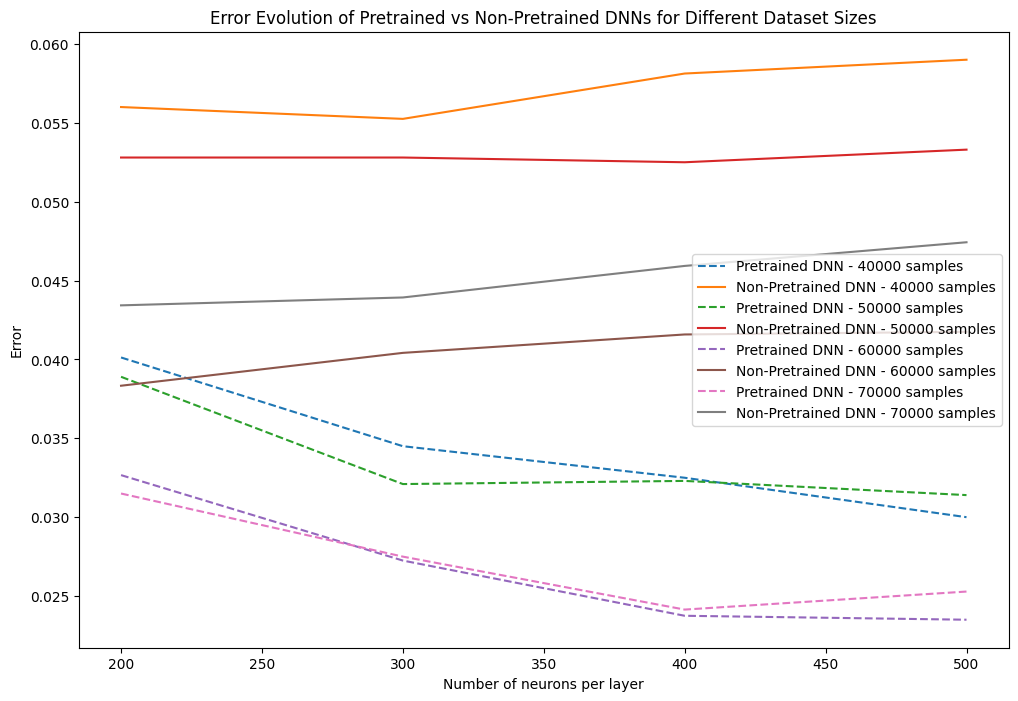

In [39]:
dataset_sizes = [40000, 50000, 60000, 70000]

pretrained_errors_by_size = []
non_pretrained_errors_by_size = []

for size in dataset_sizes:
    resampled_data, resampled_labels = resample(data, labels, n_samples=size)
    y_one_hot_resampled = encoder.transform(np.array(resampled_labels).reshape(-1, 1))
    
    train_data_resampled, test_data_resampled, train_labels_resampled, test_labels_resampled = train_test_split(
        resampled_data, y_one_hot_resampled, test_size=0.2
    )
    
    pretrained_errors = []
    for layer_sizes in layer_sizes_list:
        dnn = DNN(layer_sizes)
        dnn.pretrain_DNN(nb_epoch, learning_rate, batch_size, train_data_resampled)
        dnn.retropropagation(nb_epoch, learning_rate, batch_size, train_data_resampled, train_labels_resampled)
        error = dnn.test_DNN(test_data_resampled, test_labels_resampled)
        pretrained_errors.append(error)
    pretrained_errors_by_size.append(pretrained_errors)
    
    non_pretrained_errors = []
    for layer_sizes in layer_sizes_list:
        dnn = DNN(layer_sizes)
        dnn.retropropagation(nb_epoch, learning_rate, batch_size, train_data_resampled, train_labels_resampled)
        error = dnn.test_DNN(test_data_resampled, test_labels_resampled)
        non_pretrained_errors.append(error)
    non_pretrained_errors_by_size.append(non_pretrained_errors)

plt.figure(figsize=(12, 8))

for idx, size in enumerate(dataset_sizes):
    plt.plot(x_values, pretrained_errors_by_size[idx], label=f"Pretrained DNN - {size} samples", linestyle='--')
    plt.plot(x_values, non_pretrained_errors_by_size[idx], label=f"Non-Pretrained DNN - {size} samples", linestyle='-')

plt.xlabel("Number of neurons per layer")
plt.ylabel("Error")
plt.title("Error Evolution of Pretrained vs Non-Pretrained DNNs for Different Dataset Sizes")
plt.legend()
plt.show()